<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
#sac_csv = './datasets/sacramento_real_estate_transactions.csv'
df = pd.read_csv('./datasets/sacramento_real_estate_transactions.csv')

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [4]:
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [5]:
# There is plenty of mising data for bed/bath and lots of placeholder values for price. One entry
# had everything loaded backwards. To clean, we will manually fix the entry that is saved in reverse,
# replace 0s in the bed and bath columns with NaN, as well as all of the prices below 30k. At that
# point, we can dropna and reevaluate the dataset for integrity and cohesion. Alternatively, we can
# just use a boolean mask to filter out bad rows. I'm not sure if lat and long will be relevant to
# the analysis, so for now I will leave them alone. If they prove useful later, I can go back and clean
# those portions as well.

In [6]:
# Replace entries with 'AC' as state acronym with the proper 'CA' value
df['state'].replace('AC', 'CA', inplace=True)

In [7]:
# Replace negative values with positives
df['sq__ft'] = abs(df['sq__ft'])
df['price'] = abs(df['price'])

In [8]:
# boolean mask for drop conditions
mask = (df['beds'] != 0) & (df['baths'] != 0) & (df['price'] > 20000) & (df['sq__ft'] > 0)

# replacing our dataframe with a filtered version
df = df[mask]

In [9]:
# Making sure the column values now make more sense
df.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,813.000000,813.000000,813.00000,813.000000,813.000000,813.000000,813.000000
mean,95761.587946,3.244772,1.95818,1585.942189,229728.134071,38.380137,-121.181980
std,85.352045,0.852619,0.66638,647.423526,119633.032607,5.615689,5.614373
min,95603.000000,1.000000,1.00000,484.000000,30000.000000,-121.503471,-121.550527
25%,95670.000000,3.000000,2.00000,1144.000000,148750.000000,38.473775,-121.451444
50%,95820.000000,3.000000,2.00000,1418.000000,208000.000000,38.591618,-121.404999
75%,95828.000000,4.000000,2.00000,1851.000000,285000.000000,38.674864,-121.325730
max,95864.000000,8.000000,5.00000,4400.000000,884790.000000,39.008159,38.668433


_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

In [10]:
df.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [11]:
# A: Bedroom and bathroom count, coupled with square footage will probably be good predictors of price. Location
# would factor in as well, but I have no idea how to deal with that data meaningfully.

In [12]:
predictors = ['city', 'zip', 'beds', 'baths', 'sq__ft', 'type', 'price']

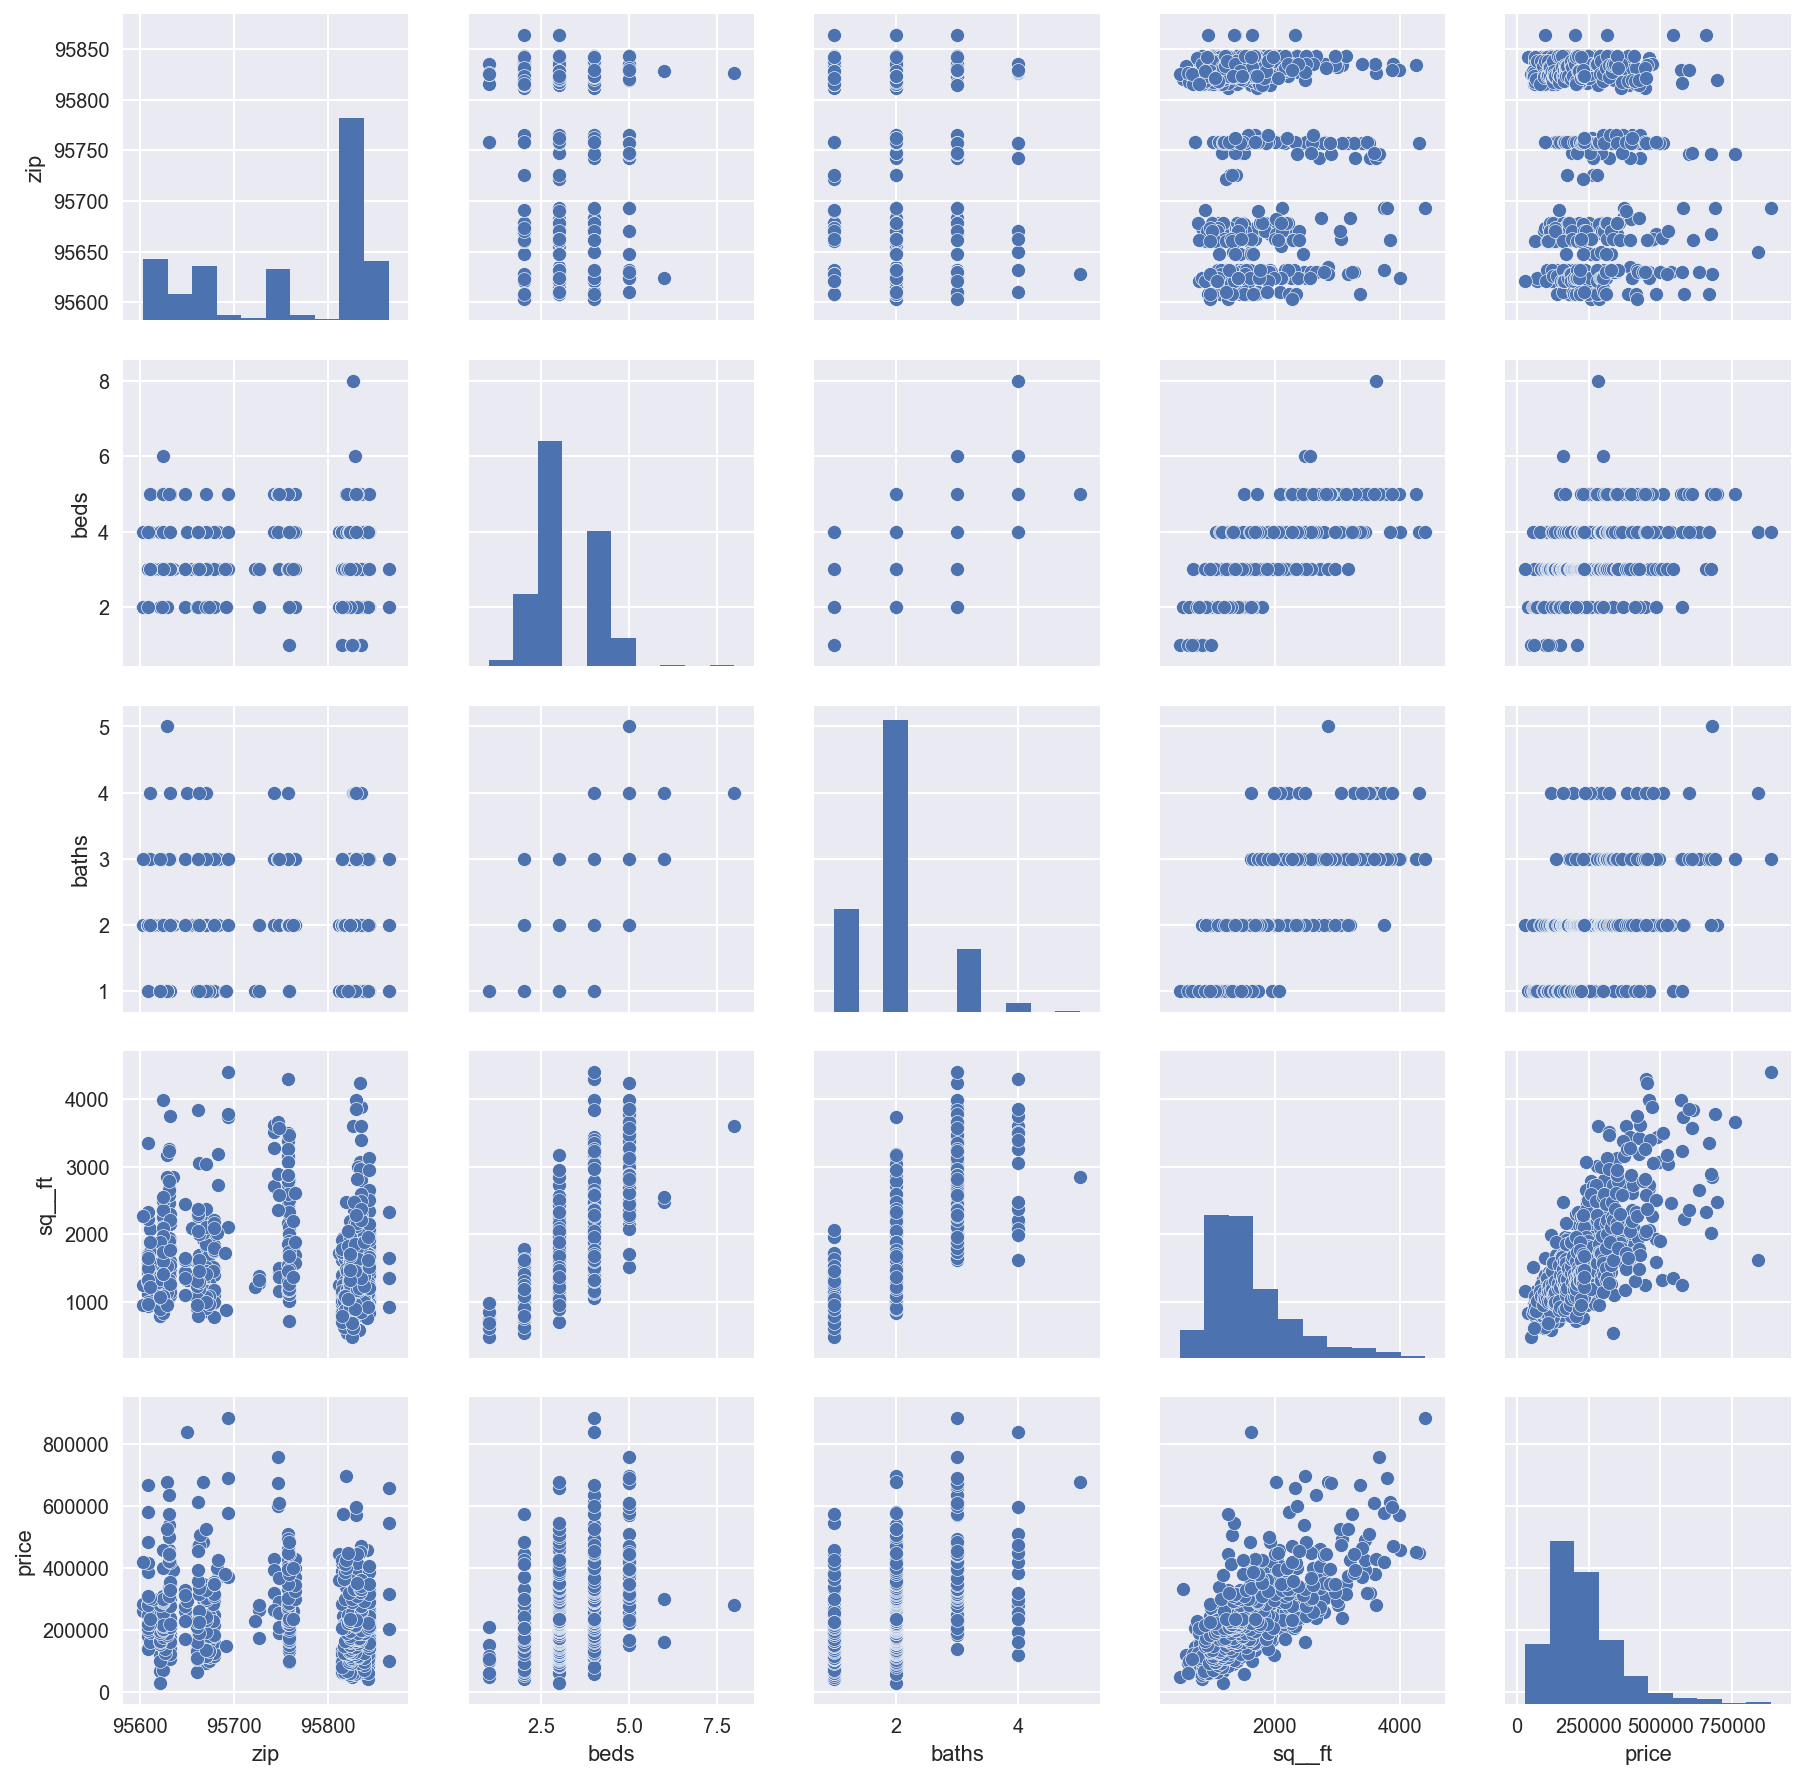

In [11]:
#fig = plt.figure(figsize=(10, 10))
sns.pairplot(df[predictors]);

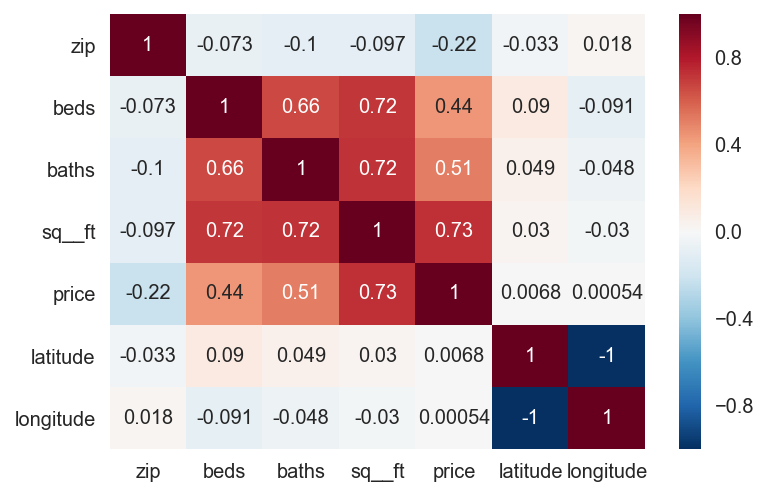

In [13]:
sns.heatmap(df.corr(), annot=True);

From the above, we see the strongest correlation to price is square footage

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [13]:
df.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

A: square feet, as it has the strongest correlation with Y and meets the necessary requirements for linear regression

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [14]:
# At least one of these imports is superfluous but I'm not sure which one
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [15]:
lr = LinearRegression()

In [18]:
X = df[['sq__ft']]
y = df[['price']]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [20]:
model = lr.fit(X_train, y_train)

In [21]:
print('Slope coefficient is: ', model.coef_)
print('Intercept is: ', model.intercept_)

Slope coefficient is:  [[134.07562712]]
Intercept is:  [15381.50955901]


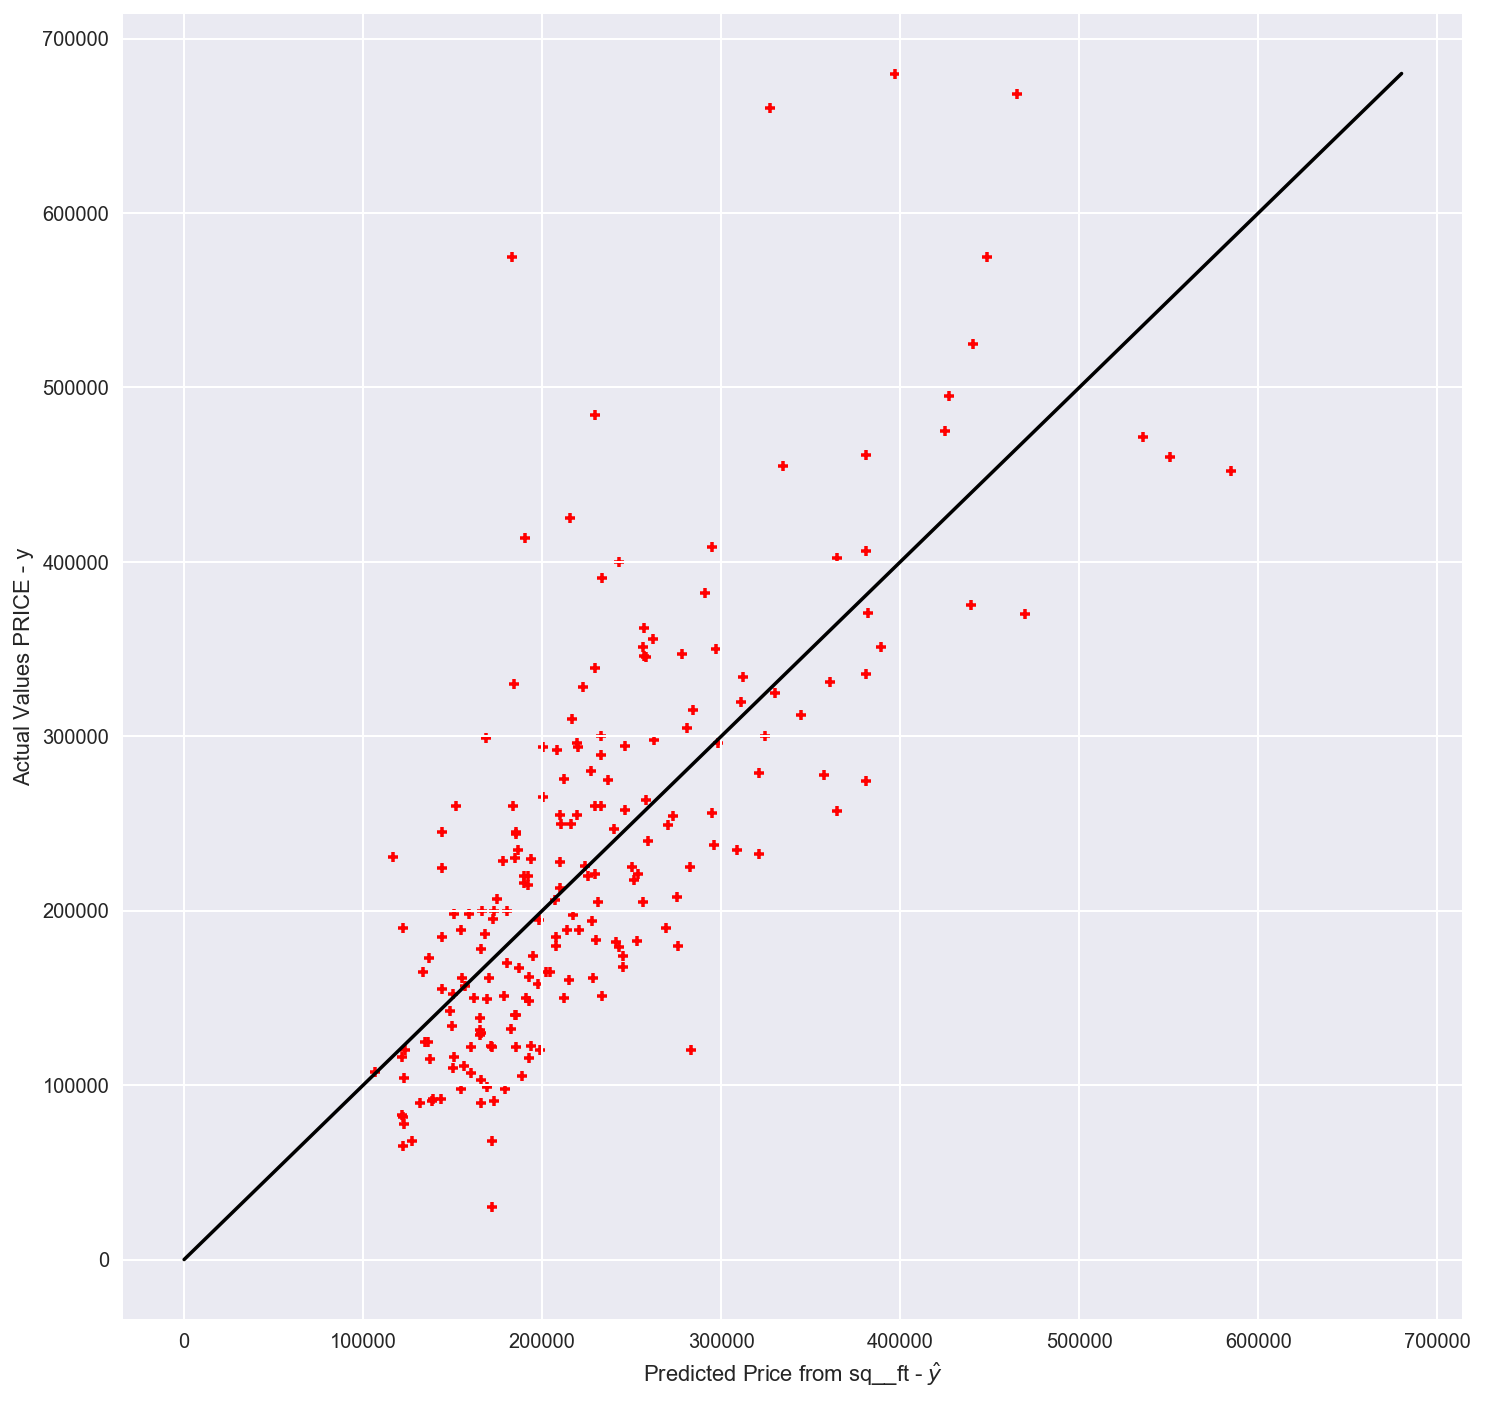

score:  0.5462401375833028


In [23]:
predictions  =  model.predict(X_test)
score        =  model.score(X_test, y_test)

# Plot the model
fig = plt.figure(figsize=(12, 12))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=0)
plt.xlabel("Predicted Price from sq__ft - $\hat{y}$")
plt.ylabel("Actual Values PRICE - y")

plt.plot([0, np.max(y_test)], [0, np.max(y_test)], c = 'k')

plt.show()

print("score: ", score)

### 6. Interpret the intercept. Interpret the slope.

Slope - The value of housing in Sacremento, on average, increases \$134.64 per square foot.
Intercept - The (theoretical) starting value of housing in Sacramento (sq__ft == 0) is approximately $16,195.55

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

Prediction - Given a square foot value, this model could be used to get a ballpark estimate of how much the property in question might be worth in sale.  
Inference - If additional variables such as zipcode are taken into consideration, we could answer questions along the lines of how much square footage is worth based on location in Sacramento

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [24]:
# generate 'type' dummy columns. If Multi-Family and Residential both = 0, type is Condo
df = pd.get_dummies(df, columns=['type'], drop_first=True)

---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [25]:
# A: All instances were circumstantially eliminated during the boolean mask pruning phase

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [26]:
#from sklearn.preprocessing import StandardScaler
#from sklearn.model_selection import train_test_split
lr = LinearRegression()
df.head()

,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,type_Multi-Family,type_Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,0,1


In [27]:
y = df['price']
#X = df['beds', 'baths', 'sq__ft', 'type_Multi-Family', 'type_Residential']
X = df.drop(columns=['street', 'city', 'zip', 'state', 'sale_date', 'latitude', 'longitude'])

In [28]:
X.columns

Index(['beds', 'baths', 'sq__ft', 'price', 'type_Multi-Family',
       'type_Residential'],
      dtype='object')

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [30]:
model = lr.fit(X_train, y_train)
y_hat = model.predict(X_test)

In [41]:
model.score(X_test,y_test)
# ruh roh

1.0

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

> **Tip:** with seaborn's `sns.lmplot` you can set `x`, `y`, and even a `hue` (which will plot regression lines by category in different colors) to easily plot a regression line.

In [35]:
sns.lmplot(X, y, df)

/Users/Arya/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/indexes/base.py:3140: RuntimeWarning: '<' not supported between instances of 'str' and 'int', sort order is undefined for incomparable objects
  return this.join(other, how=how, return_indexers=return_indexers)


ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [36]:
# A: The linear relationship exists, and the residiuals are consistent,
# but that is because the model is overfit and there are no residuals!

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [37]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [38]:
import sklearn.metrics as metrics

In [39]:
#metrics.r2_score(y, y_hat)

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [44]:
print(metrics.mean_absolute_error(y_test, y_hat))
print(metrics.mean_squared_error(y_test, y_hat))
print(metrics.mean_squared_log_error(y_test, y_hat))
print(metrics.median_absolute_error(y_test, y_hat))
print(metrics.r2_score(y_test, y_hat))

6.890759858138421e-11
8.44749279994546e-21
4.021643830538491e-31
5.820766091346741e-11
1.0


### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [ ]:
# A:

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [96]:
#Overly high variance. The proof is in the fact that it is a perfect fit to the data